# NAME:SASMITHA SREE
# GRIP
# TASK -3
# DATA SCIENCE AND BUSINESS ANALYTICS

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df= pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### preprocessing

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
df["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

### state can be droped as it has constant values

In [9]:
 df.drop(["Country"],axis=1,inplace=True)

In [10]:
df.duplicated().sum()

17

In [11]:
df.drop_duplicates(keep=False).shape

(9960, 12)

#### spliting into train and test data

In [12]:
from sklearn.model_selection import train_test_split
x= df.drop(['Profit'],axis=1)
y=df['Profit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,shuffle=False)
x_train.shape,x_test.shape

((6995, 11), (2999, 11))

## DATA ANALYSIS OR EDA WITH x_train and y_train

In [13]:
x_train.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20


C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

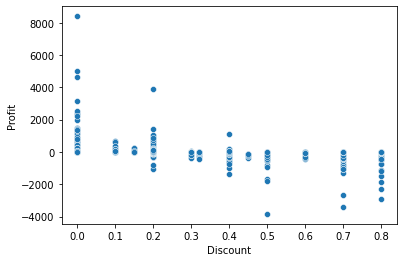

In [14]:
x=x_train["Discount"]
y=y_train
sns.scatterplot(x,y)

### less the discount more the profit

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

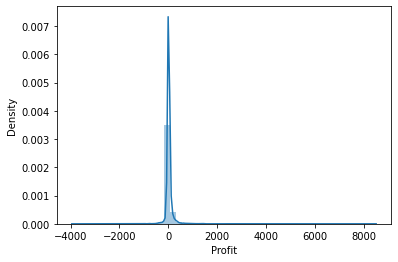

In [15]:
sns.distplot(y_train)

### It is symmetric graph

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

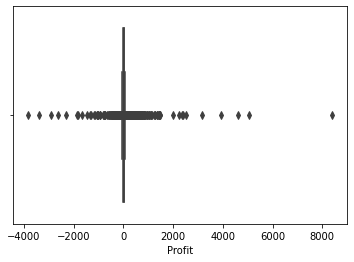

In [16]:
sns.boxplot(y_train)

### there are outliers

In [17]:
upper=y_train.mean()+3 *y_train.std()
lower =y_train.mean()-3*y_train.std()
upper,lower

(688.5274826817924, -630.6871277139583)

In [18]:
y_train.value_counts()

 0.0000     42
 6.2208     29
 9.3312     27
 3.6288     25
 5.4432     24
            ..
 38.0864     1
-7.6800      1
 8.2302      1
 7.9704      1
 97.2000     1
Name: Profit, Length: 5498, dtype: int64

In [19]:
y_train.describe()

count    6995.000000
mean       28.920177
std       219.869102
min     -3839.990400
25%         1.961100
50%         8.920600
75%        29.950000
max      8399.976000
Name: Profit, dtype: float64

In [20]:
y_train.mode()

0    0.0
dtype: float64

### many of the rows have zero profit

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

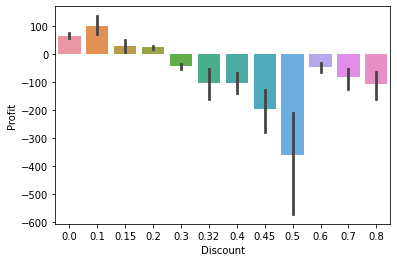

In [21]:
sns.barplot(x_train["Discount"],y_train)

#### As the discount increases there is less profit 

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Sales'>

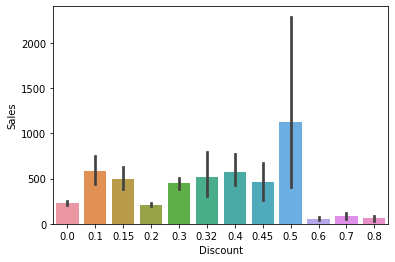

In [22]:
sns.barplot(x_train["Discount"],x_train["Sales"])

### In 0.5 discount there was less profit but more sales

#### more discout has more sales but less profit when the is no discount there is less sales but more profit 

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

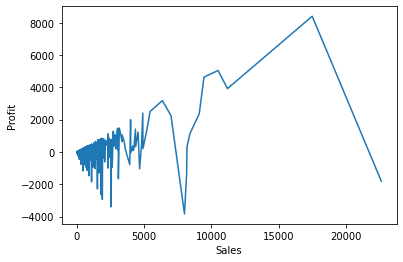

In [23]:
sns.lineplot(x_train["Sales"],y_train)

### the profit has random reduction

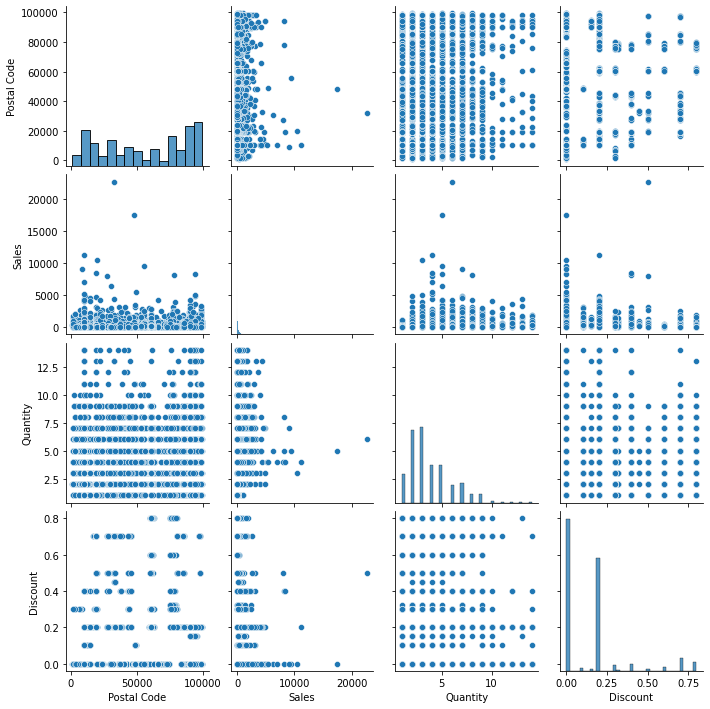

In [24]:
sns.pairplot(x_train)

In [25]:
k = x_train.merge(y_train , on = x_train.index ).corr()
k

,key_0,Postal Code,Sales,Quantity,Discount,Profit
key_0,1.000000,0.022797,0.000739,-0.009762,-0.032316,0.029892
Postal Code,0.022797,1.000000,-0.024615,0.010366,0.057822,-0.037478
Sales,0.000739,-0.024615,1.000000,0.191324,-0.020479,0.453617
Quantity,-0.009762,0.010366,0.191324,1.000000,0.011614,0.066459
Discount,-0.032316,0.057822,-0.020479,0.011614,1.000000,-0.225215
Profit,0.029892,-0.037478,0.453617,0.066459,-0.225215,1.000000


<AxesSubplot:>

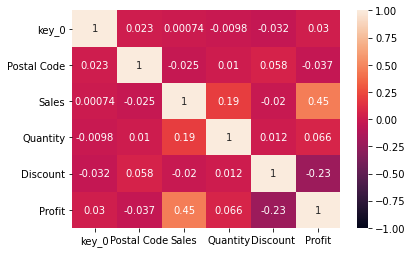

In [26]:
sns.heatmap(k,vmax=1,vmin=-1,annot=True)

In [27]:
k.cov()

,key_0,Postal Code,Sales,Quantity,Discount,Profit
key_0,0.166416,-0.026189,-0.051304,-0.046321,-0.040715,-0.030217
Postal Code,-0.026189,0.165909,-0.067977,-0.040760,-0.002348,-0.063704
Sales,-0.051304,-0.067977,0.163284,0.014701,-0.070694,0.116421
Quantity,-0.046321,-0.040760,0.014701,0.154508,-0.032452,-0.011213
Discount,-0.040715,-0.002348,-0.070694,-0.032452,0.190254,-0.126376
Profit,-0.030217,-0.063704,0.116421,-0.011213,-0.126376,0.197405


In [28]:
x_train[x_train.Discount==0]

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.86,7,0.0
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.28,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6990,Second Class,Consumer,Hampton,Virginia,23666,South,Office Supplies,Appliances,44.43,3,0.0
6991,Second Class,Consumer,Hampton,Virginia,23666,South,Technology,Phones,226.20,5,0.0
6992,Second Class,Consumer,Hampton,Virginia,23666,South,Furniture,Furnishings,186.54,3,0.0
6993,Second Class,Consumer,Hampton,Virginia,23666,South,Office Supplies,Art,265.86,7,0.0


### less discount has more profit 3437 rows have less discount

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='count'>

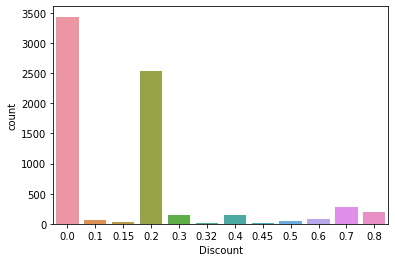

In [29]:
sns.countplot(x_train["Discount"])

### checking which region has more profit

In [30]:
x_train.merge(y_train,on=x_train.index).groupby(["Region"])["Profit"].agg(['max']).unstack().T.idxmax()

('max', 'Central')

In [31]:
x_train["Region"].value_counts()

West       2266
East       1991
Central    1612
South      1126
Name: Region, dtype: int64

### Central region is having more profit

<AxesSubplot:ylabel='Region'>

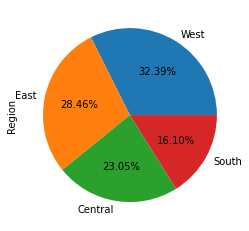

In [32]:
plt.figure(figsize=(4,4))
x_train["Region"].value_counts().plot.pie(autopct ="%1.2f%%")

In [33]:
x_train.merge(y_train,on=x_train.index).groupby(["Category"])["Profit"].agg(['max']).unstack().T.idxmax()


('max', 'Technology')

In [34]:
x_train.merge(y_train,on=x_train.index).groupby(["Sub-Category"])["Profit"].agg(['max']).unstack().T.idxmax()

('max', 'Copiers')

<AxesSubplot:ylabel='Sub-Category'>

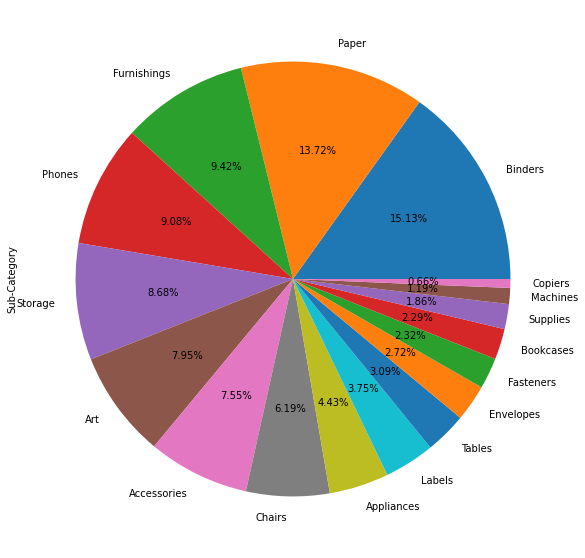

In [35]:
plt.figure(figsize=(10,10))
x_train["Sub-Category"].value_counts().plot.pie(autopct ="%1.2f%%")

<AxesSubplot:ylabel='Category'>

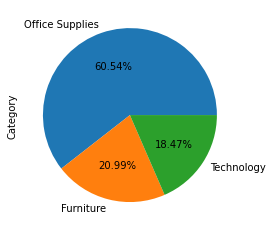

In [36]:
plt.figure(figsize=(4,4))
x_train["Category"].value_counts().plot.pie(autopct ="%1.2f%%")

#### profit is more in Techonologies and Copiers 
#### from pie chart , it is found copiers and techonology are present in less percent 

#### looking towards sales

In [37]:
x_train.merge(y_train,on=x_train.index).groupby(["Category"])["Sales"].agg(["max"]).unstack().T.idxmax()

('max', 'Technology')

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='Sales'>

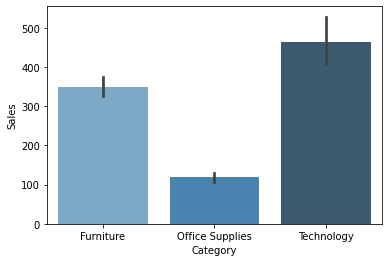

In [38]:
sns.barplot(x_train["Category"],x_train["Sales"],palette ="Blues_d")

### Techonology region has more sales and profit

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='Discount'>

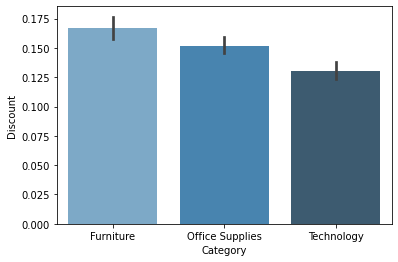

In [39]:
sns.barplot(x_train["Category"],x_train["Discount"],palette ="Blues_d")

#### There is less discount in Techonology

In [40]:
x_train.merge(y_train,on=x_train.index).groupby(["State"])["Sales"].agg(["max"]).unstack().T.idxmax()

('max', 'Florida')

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='Sales'>

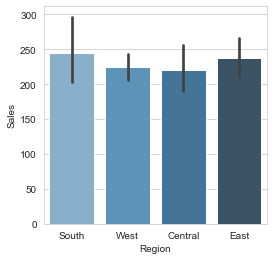

In [41]:
plt.figure(figsize=(4,4))
sns.set_style("whitegrid")
x=x_train["Region"]
y=x_train["Sales"]
sns.barplot(x,y,palette="Blues_d")

### south region has more sales

C:\Users\SASMITHA SREE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

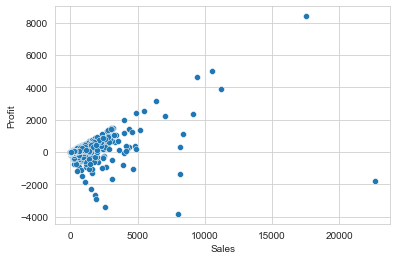

In [42]:
sns.scatterplot(x_train["Sales"],y_train)

In [43]:
### Thank you